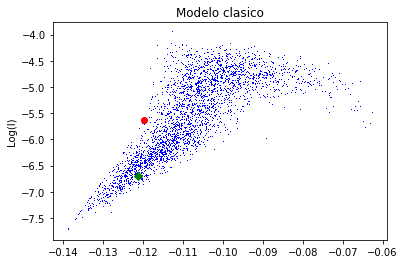

In [32]:
#Figura 6. Evaluación numérica de la aplicación de Poincaré para el modelo SIRS con estocasticidad ambiental. 

from numpy import linspace,cos,log,ones,random,sqrt
from scipy import pi,array,zeros,integrate,linalg
from pylab import plot,show,loglog,ion,ioff,xlabel,ylabel
from pylab import title,subplot,text

def func(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

class IteratedMapping(object):
    
    def __init__(self):
        self.n_pts = 100
        self.tdata = linspace(0.0,1.0,self.n_pts)

    def iterate_map(self,y0,p):
        y1 = integrate.odeint(func,y0,self.tdata,args=(p,))[-1,:]
        return y1

    def get_map(self,noise_level,q_pts,p):
        ySoln = zeros([q_pts,2])
        y0 = array([0.9,0.05])
        y0 = integrate.odeint(func,y0,linspace(0.0,100.0,2000),args=(p,))[-1,:]
        y0 = self.iterate_map(y0,p)
        y1 = y0.copy()
        ySoln[0,:] = y1
        for k in range(1,q_pts):
            y0 = self.iterate_map(y0,p)
            if not y0[0]*y0[1] == 0.0:
                ySoln[k,:] = y0
            y0[0] = y0[0]*random.normal(loc=1,scale=noise_level)
            y0[1] = y0[1]*random.normal(loc=1,scale=noise_level)
            y0 = abs(y0)
            if sum(y0) > 1.0:
                y0 = y0/linalg.norm(y0)
        y0 = self.iterate_map(y0,p)
        y0 = abs(y0)
        if sum(y0) > 1.0:
            y0 = y0/linalg.norm(y0)
        return ySoln

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu

myiterate = IteratedMapping()

q = array([4.28467402e+01, 2.91359345e-01])          

ySoln1 = myiterate.get_map(0.05,3000,q)
plot(log(ySoln1[1:-1,0]),log(ySoln1[1:-1,1]),'b,')
plot(log(ySoln1[0,0]),log(ySoln1[0,1]),'gD')
plot(log(ySoln1[-1,0]),log(ySoln1[-1,1]),'ro')
ylabel(r'Log(I)')
title('Modelo clasico')
show()


C:\Users\Juli\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log


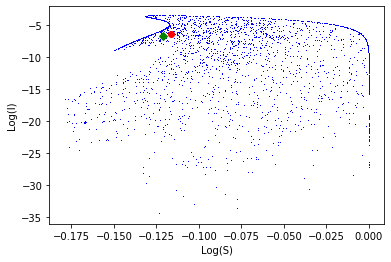

In [33]:
from numpy import linspace,cos,log,ones,random,sqrt
from scipy import pi,array,zeros,integrate,linalg
from pylab import plot,show,loglog,ion,ioff,xlabel,ylabel
from pylab import title,subplot,text

def func(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

class IteratedMapping(object):
    
    def __init__(self):
        self.n_pts = 100
        self.tdata = linspace(0.0,1.0,self.n_pts)

    def iterate_map(self,y0,p):
        y1 = integrate.odeint(func,y0,self.tdata,args=(p,))[-1,:]
        return y1

    def get_map(self,noise_level,q_pts,p):
        ySoln = zeros([q_pts,2])
        y0 = array([0.9,0.05])
        y0 = integrate.odeint(func,y0,linspace(0.0,100.0,2000),args=(p,))[-1,:]
        y0 = self.iterate_map(y0,p)
        y1 = y0.copy()
        ySoln[0,:] = y1
        for k in range(1,q_pts):
            y0 = self.iterate_map(y0,p)
            if not y0[0]*y0[1] == 0.0:
                ySoln[k,:] = y0
            y0[0] = y0[0]*random.normal(loc=1,scale=noise_level)
            y0[1] = y0[1]*random.normal(loc=1,scale=noise_level)
            y0 = abs(y0)
            if sum(y0) > 1.0:
                y0 = y0/linalg.norm(y0)
        y0 = self.iterate_map(y0,p)
        y0 = abs(y0)
        if sum(y0) > 1.0:
            y0 = y0/linalg.norm(y0)
        return ySoln

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu

myiterate = IteratedMapping()

q = array([4.28467402e+01, 2.91359345e-01]) 

ySoln2 = myiterate.get_map(0.5,3000,q)
plot(log(ySoln2[1:-1,0]),log(ySoln2[1:-1,1]),'b,')
plot(log(ySoln2[0,0]),log(ySoln2[0,1]),'gD')
plot(log(ySoln2[-1,0]),log(ySoln2[-1,1]),'ro')
ylabel(r'Log(I)')
xlabel(r'Log(S)')
show()

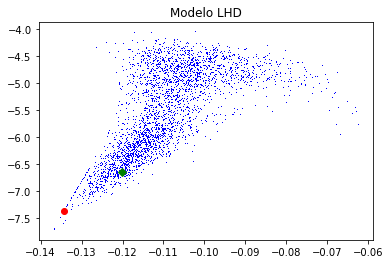

In [34]:
from numpy import linspace,cos,log,ones,random,sqrt
from scipy import pi,array,zeros,integrate,linalg
from pylab import plot,show,loglog,ion,ioff,xlabel,ylabel
from pylab import title,subplot,axis

def func(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

class IteratedMapping(object):
    
    def __init__(self):
        self.n_pts = 100
        self.tdata = linspace(0.0,1.0,self.n_pts)

    def iterate_map(self,y0,p):
        y1 = integrate.odeint(func,y0,self.tdata,args=(p,))[-1,:]
        return y1

    def get_map(self,noise_level,q_pts,p): 
        ySoln = zeros([q_pts,2])
        y0 = array([0.9,0.05])
        y0 = integrate.odeint(func,y0,linspace(0.0,100.0,2000),args=(p,))[-1,:]
        y0 = self.iterate_map(y0,p)
        y1 = y0.copy()
        ySoln[0,:] = y1
        for k in range(1,q_pts):
            y0 = self.iterate_map(y0,p)
            if not y0[0]*y0[1] == 0.0:
                ySoln[k,:] = y0
            y0[0] = y0[0]*random.normal(loc=1,scale=noise_level)
            y0[1] = y0[1]*random.normal(loc=1,scale=noise_level)
            y0 = abs(y0)
            if sum(y0) > 1.0:
                y0 = y0/linalg.norm(y0)
        y0 = self.iterate_map(y0,p)
        y0 = abs(y0)
        if sum(y0) > 1.0:
            y0 = y0/linalg.norm(y0)
        return ySoln

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu

myiterate = IteratedMapping()

q = array([ 4.28779903e+01,   2.70760668e-01,   2.43100720e-06])

ySoln1 = myiterate.get_map(0.05,3000,q)
plot(log(ySoln1[1:-1,0]),log(ySoln1[1:-1,1]),'b,')
plot(log(ySoln1[0,0]),log(ySoln1[0,1]),'gD')
plot(log(ySoln1[-1,0]),log(ySoln1[-1,1]),'ro')
title('Modelo LHD')
show()


C:\Users\Juli\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log


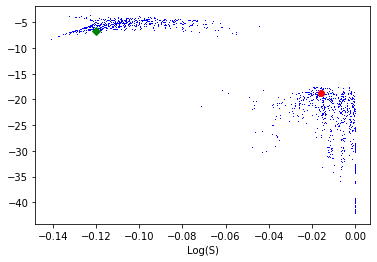

In [41]:
from numpy import linspace,cos,log,ones,random,sqrt
from scipy import pi,array,zeros,integrate,linalg
from pylab import plot,show,loglog,ion,ioff,xlabel,ylabel
from pylab import title,subplot,axis

def func(y, t, p):
    f = zeros([2])
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

class IteratedMapping(object):
    
    def __init__(self):
        self.n_pts = 100
        self.tdata = linspace(0.0,1.0,self.n_pts)

    def iterate_map(self,y0,p):
        y1 = integrate.odeint(func,y0,self.tdata,args=(p,))[-1,:]
        return y1

    def get_map(self,noise_level,q_pts,p): 
        ySoln = zeros([q_pts,2])
        y0 = array([0.9,0.05])
        y0 = integrate.odeint(func,y0,linspace(0.0,100.0,2000),args=(p,))[-1,:]
        y0 = self.iterate_map(y0,p)
        y1 = y0.copy()
        ySoln[0,:] = y1
        for k in range(1,q_pts):
            y0 = self.iterate_map(y0,p)
            if not y0[0]*y0[1] == 0.0:
                ySoln[k,:] = y0
            y0[0] = y0[0]*random.normal(loc=1,scale=noise_level)
            y0[1] = y0[1]*random.normal(loc=1,scale=noise_level)
            y0 = abs(y0)
            if sum(y0) > 1.0:
                y0 = y0/linalg.norm(y0)
        y0 = self.iterate_map(y0,p)
        y0 = abs(y0)
        if sum(y0) > 1.0:
            y0 = y0/linalg.norm(y0)
        return ySoln

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu

myiterate = IteratedMapping()

q = array([ 4.28779903e+01,   2.70760668e-01,   2.43100720e-06])

ySoln2 = myiterate.get_map(0.1,3000,q)
plot(log(ySoln2[1:-1,0]),log(ySoln2[1:-1,1]),'b,')
plot(log(ySoln2[0,0]),log(ySoln2[0,1]),'gD')
plot(log(ySoln2[-2,0]),log(ySoln2[-2,1]),'ro')
xlabel(r'Log(S)')
show()